In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# import data from csv
df = pd.read_csv('medical_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
#visually inspect df to facilitate exploration, spot problems
pd.set_option('display.max_columns', None)
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          TimeZone  \
0  34.34960 -86.72508        2951  Suburban   America/Chicago   
1  30.84513 -85.22907       11303     Urban   America/Chicago   
2  43.54321 -96.63772       17125  Suburban   America/Chicago   
3  43.89744 -93.51479        2162  Suburban   America/Chicago   
4  37.59894 -76.88958        5287     Rural  America/New_York   

                                Job  Children  Age    Income   Marital  \
0  Psychologist, sport and exercise         1   53  86575.93  Divorced   
1      Community development worker         3   51  46805.99   Married   
2           Chief Executive Officer         3   53  14370.14   Widowed   
3               Early years teacher         0   78  39741.49   Married   
4       Health promotion specialist         1   22   1209.56   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  \
0    Male      No    19.141466           6                 0          0   
1  Female      No    18.940352           4                 2          1   
2  Female      No    18.057507           4                 1          0   
3    Male      No    16.576858           4                 1          0   
4  Female      No    17.439069           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0         No  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

  Overweight Arthritis Diabetes Hyperlipidemia BackPain Anxiety  \
0         No       Yes      Yes             No      Yes     Yes   
1        Yes        No       No             No       No      No   
2        Yes        No      Yes             No       No      No   
3         No       Yes       No             No       No      No   
4         No        No       No            Yes       No      No   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work     10.585770   
1                No                Yes     No  Intravenous     15.129562   
2                No                 No     No   Blood Work      4.772177   
3                No                Yes    Yes   Blood Work      1.714879   
4               Yes                 No     No      CT Scan      1.254807   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0  3726.702860        17939.403420      3      3      2      2      4      3   
1  4193.190458        17612.998120      3      4      3      4      4      4   
2  2434.234222        17505.192460      2      4      4      4      3      4   
3  2127.830423        12993.437350      3      5      5      3      4      5   
4  2113.073274         3716.525786      2      1      3      3      5      3   

   Item7  Item8  
0      3      4  
1      3      3  
2      3  

In [3]:
#select numerical variables 
df=df.select_dtypes("number")
df.shape

(10000, 23)

In [4]:
df.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
#Define the list of columns to drop (discrete variables) 
columns_to_drop = ['CaseOrder', 'Zip', 'Population', 'Children', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'] 
#Drop the discrete variables 
cont_df = df.drop(columns=columns_to_drop) 
#Display the resulting DataFrame 
cont_df.head()

Lat       Lng  Age    Income  VitD_levels  Initial_days  TotalCharge  \
0  34.34960 -86.72508   53  86575.93    19.141466     10.585770  3726.702860   
1  30.84513 -85.22907   51  46805.99    18.940352     15.129562  4193.190458   
2  43.54321 -96.63772   53  14370.14    18.057507      4.772177  2434.234222   
3  43.89744 -93.51479   78  39741.49    16.576858      1.714879  2127.830423   
4  37.59894 -76.88958   22   1209.56    17.439069      1.254807  2113.073274   

   Additional_charges  
0        17939.403420  
1        17612.998120  
2        17505.192460  
3        12993.437350  
4         3716.525786

In [6]:
#detection of duplicates True is missing value detected
cont_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#count True and False together
print(cont_df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [8]:
#detect missing values
cont_df.isnull().sum()

Lat                   0
Lng                   0
Age                   0
Income                0
VitD_levels           0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [9]:
#check for outliers and remove
print(cont_df.shape)
cont_df = cont_df[(np.abs(stats.zscore(cont_df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(cont_df.shape)

(10000, 8)
(9688, 8)


In [10]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9688 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 9688 non-null   float64
 1   Lng                 9688 non-null   float64
 2   Age                 9688 non-null   int64  
 3   Income              9688 non-null   float64
 4   VitD_levels         9688 non-null   float64
 5   Initial_days        9688 non-null   float64
 6   TotalCharge         9688 non-null   float64
 7   Additional_charges  9688 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 681.2 KB


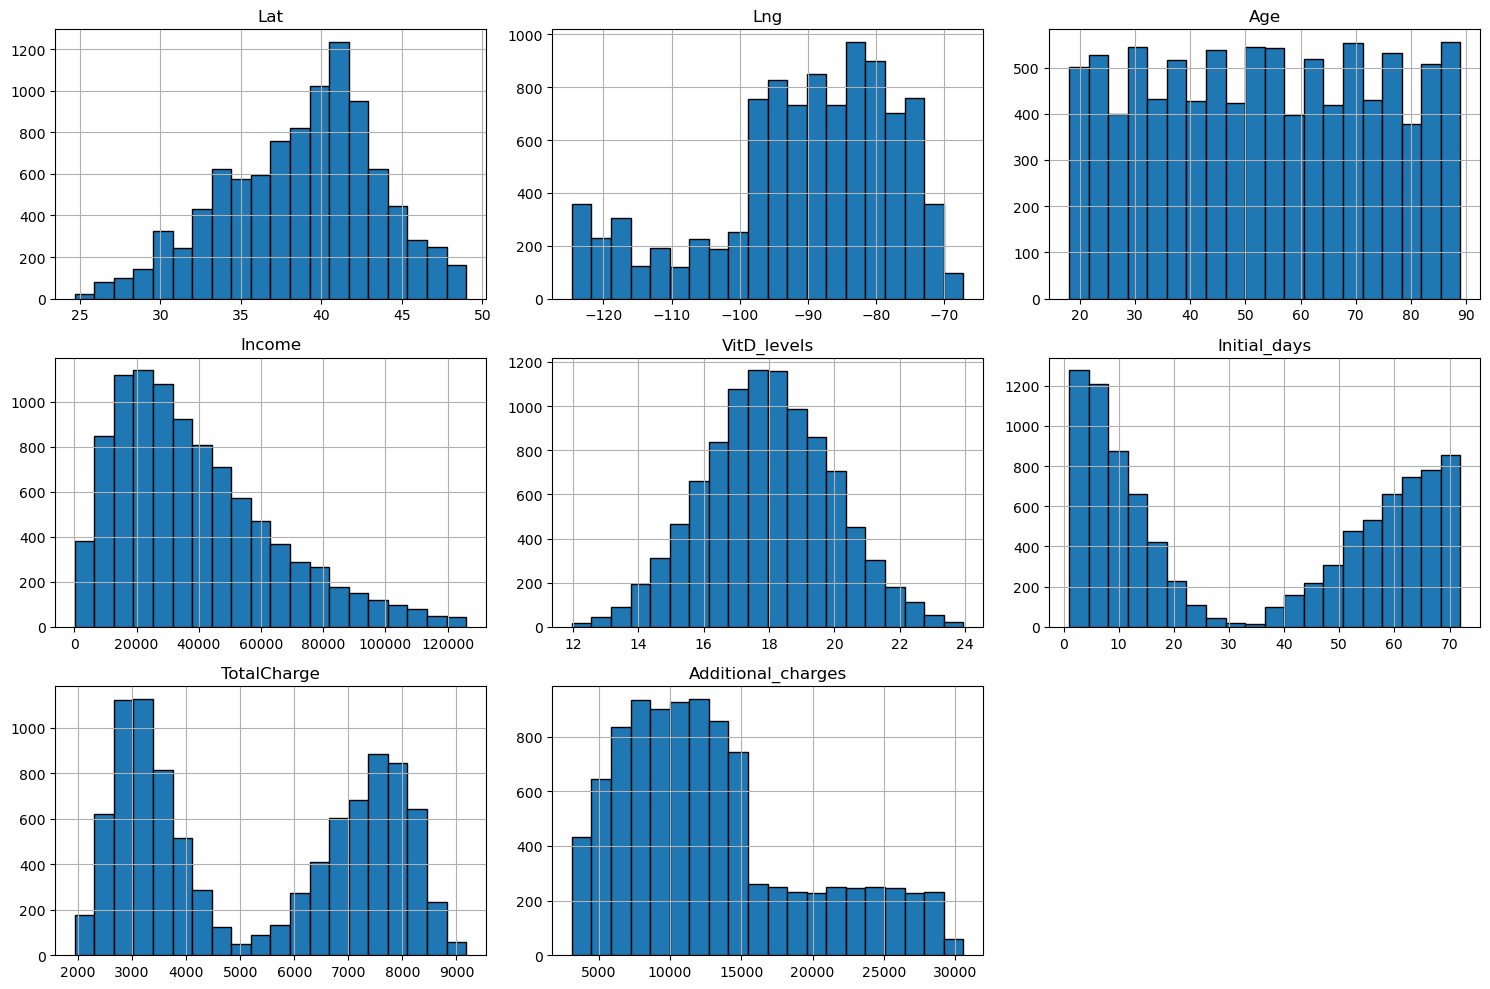

In [11]:
# Create histograms for each continuous variable 
cont_df.hist(figsize=(15, 10), bins=20, edgecolor='black') 
plt.tight_layout() 
plt.show()

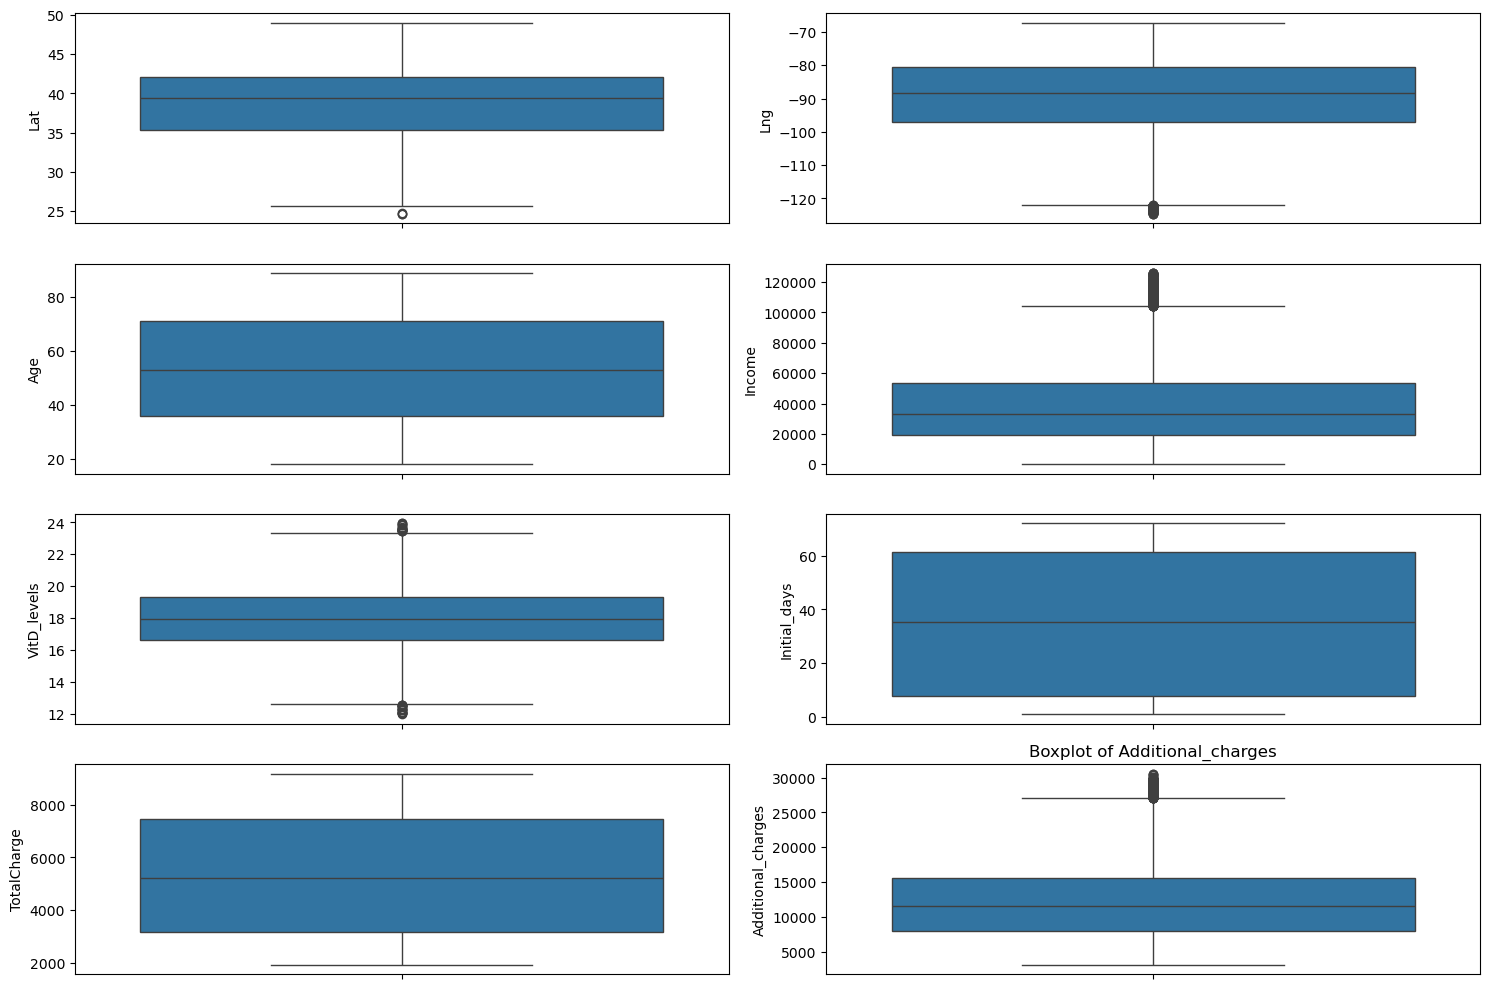

In [12]:
# Create boxplots for each continuous variable 
plt.figure(figsize=(15, 10)) 
for i, var in enumerate(cont_df.columns): 
    plt.subplot(4, 2, i + 1) 
    sns.boxplot(y=cont_df[var]) 
plt.title(f'Boxplot of {var}') 
plt.tight_layout() 
plt.show()

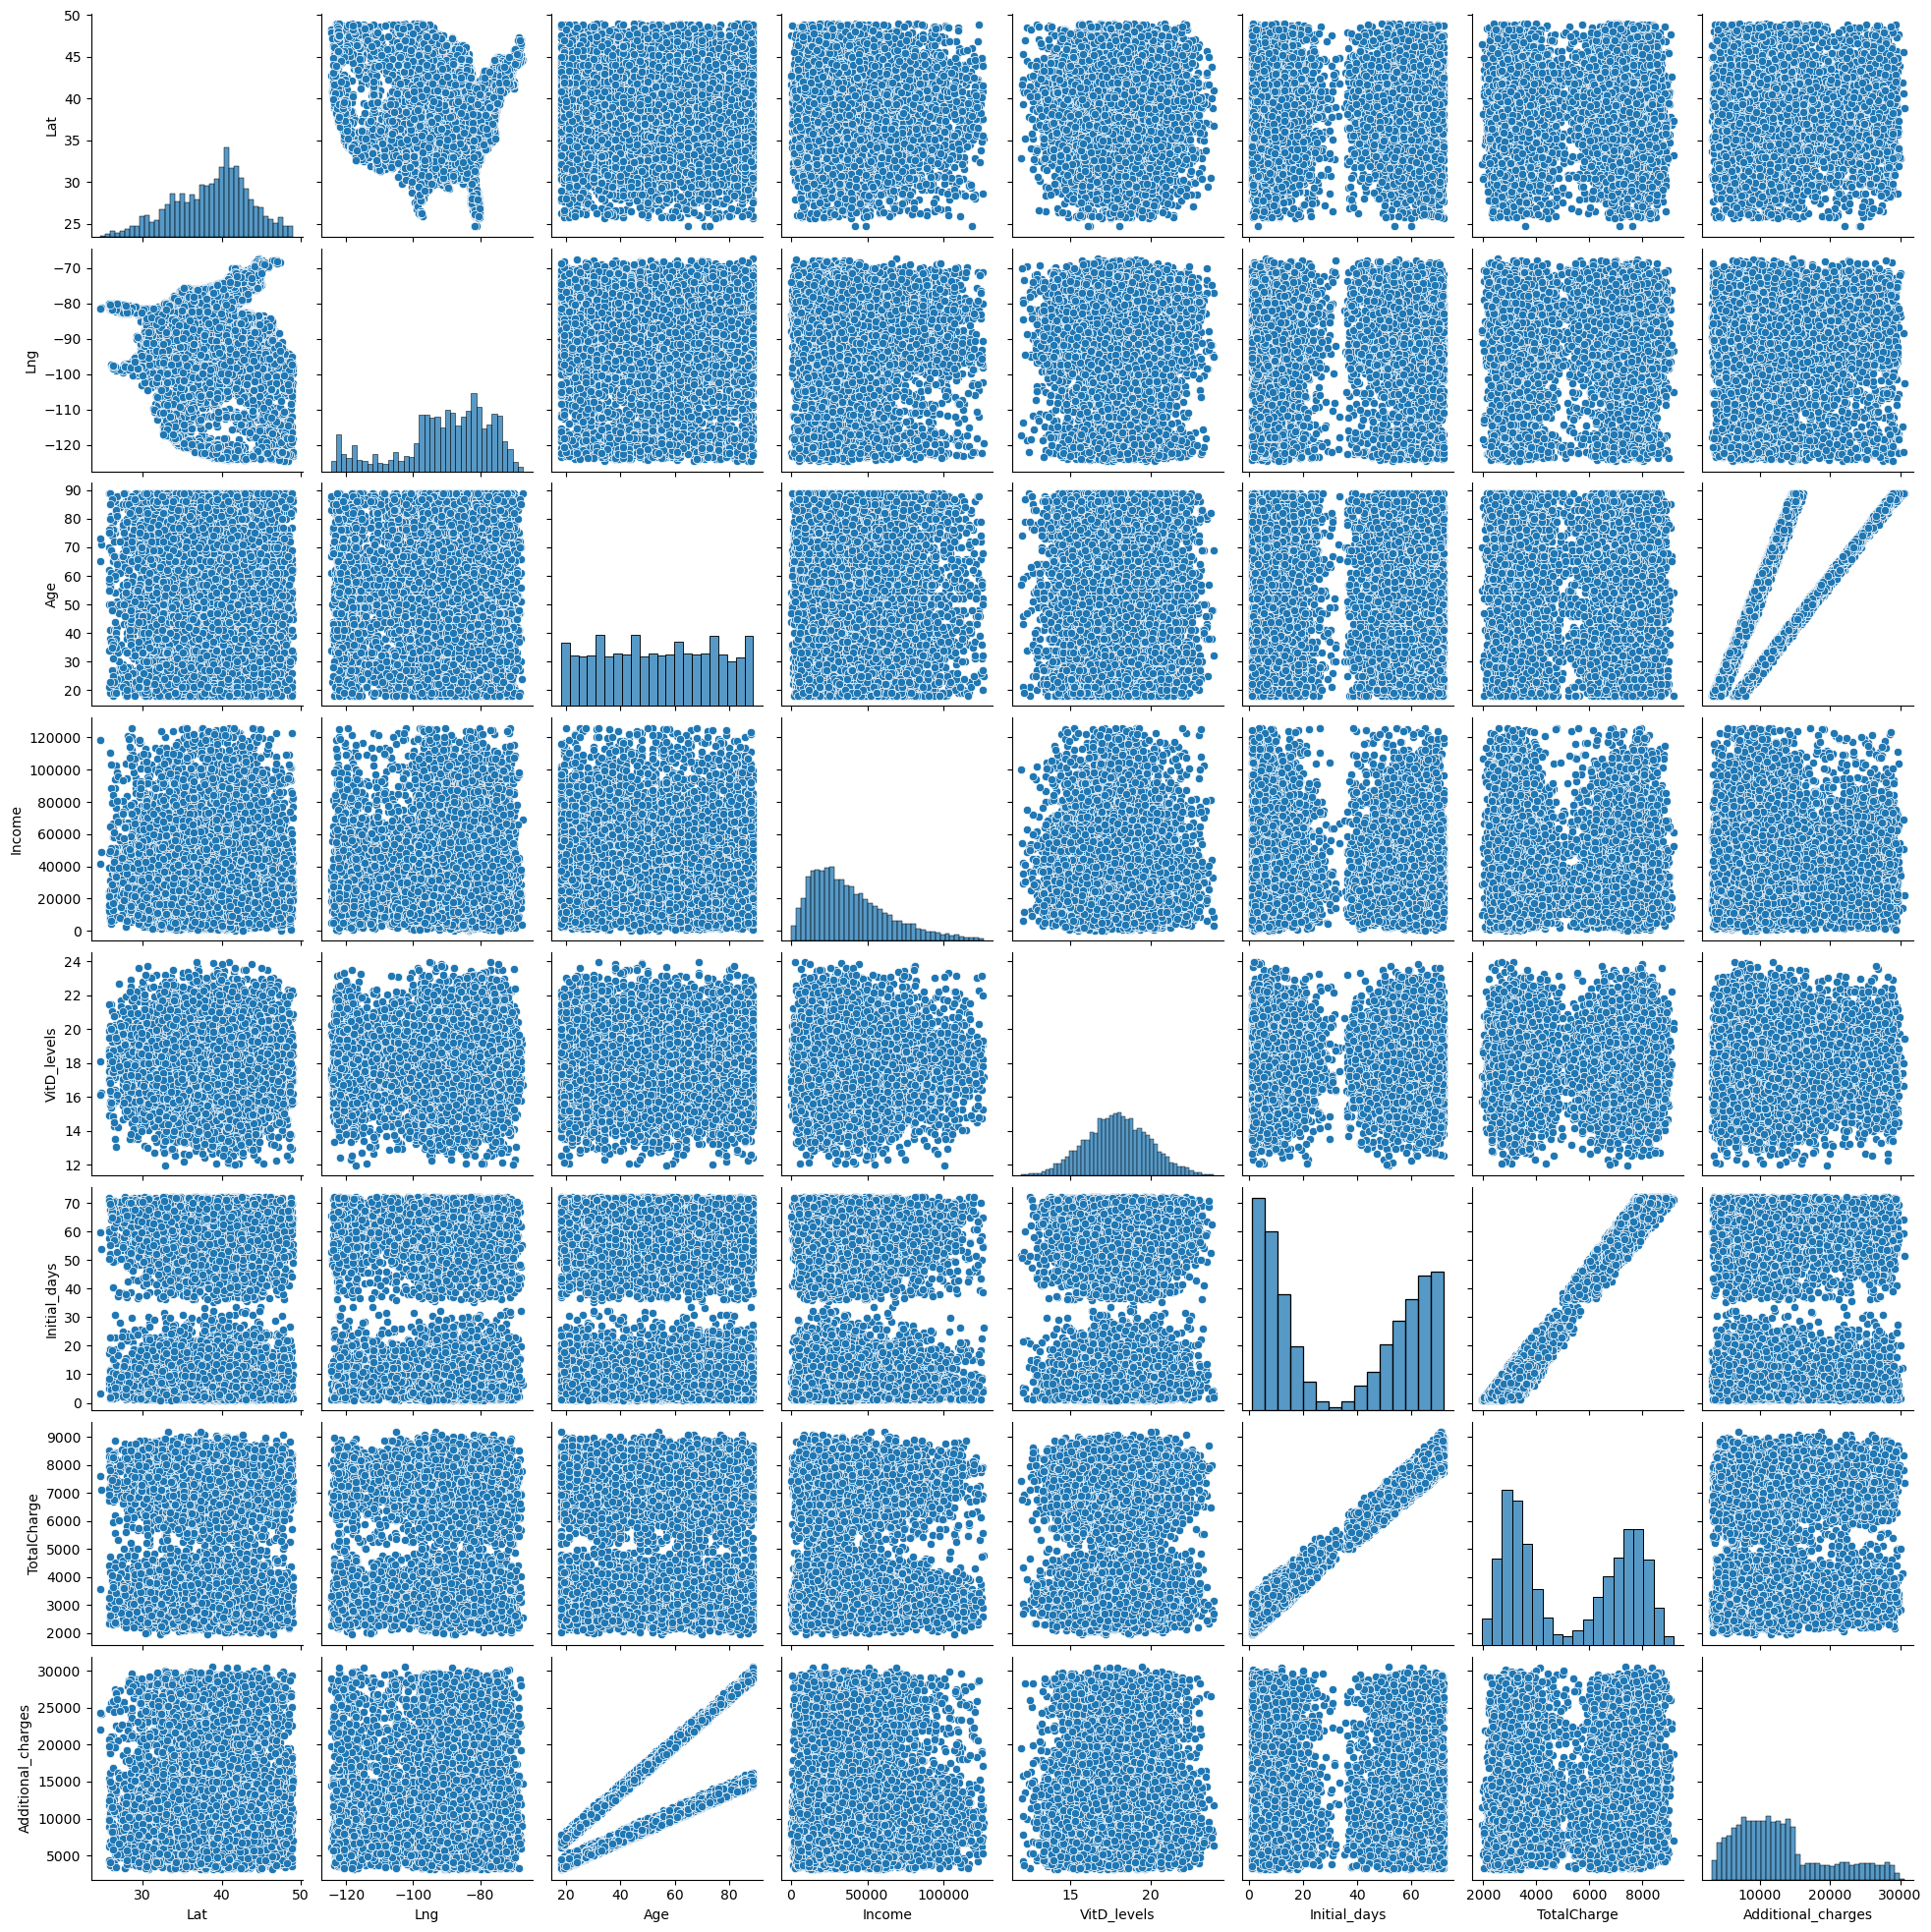

In [13]:
# Create pairplot for all variables in cont_df
sns.pairplot(cont_df) 
plt.show()

In [14]:
#get statistics for cont_df
cont_df.describe().round(2)

Lat      Lng      Age     Income  VitD_levels  Initial_days  \
count  9688.00  9688.00  9688.00    9688.00      9688.00       9688.00   
mean     38.75   -90.66    53.56   38944.10        17.96         34.47   
std       4.77    13.70    20.64   25410.94         1.99         26.32   
min      24.68  -124.63    18.00     154.08        11.97          1.00   
25%      35.36   -97.12    36.00   19465.24        16.63          7.89   
50%      39.44   -88.29    53.00   33316.60        17.95         35.42   
75%      42.02   -80.43    71.00   53303.03        19.33         61.17   
max      48.99   -67.22    89.00  125977.37        23.94         71.98   

       TotalCharge  Additional_charges  
count      9688.00             9688.00  
mean       5313.32            12946.64  
std        2182.00             6548.96  
min        1938.31             3125.70  
25%        3178.58             7989.70  
50%        5213.95            11579.73  
75%        7464.09            15633.78  
max        9180.73            30566.07

In [15]:
#standatdize the varables
scaler = StandardScaler()

scaled_data = scaler.fit_transform(cont_df)

#create a new dataframe, scaled_df, from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=cont_df.columns)

#save scaled_df to a csv file 
scaled_df.to_csv('D212_task2_scaled.csv')

scaled_df

Lat       Lng       Age    Income  VitD_levels  Initial_days  \
0    -0.920719  0.287065 -0.026892  1.874558     0.593823     -0.907451   
1    -1.654735  0.396236 -0.123796  0.309406     0.492788     -0.734780   
2     1.004896 -0.436304 -0.026892 -0.967112     0.049268     -1.128376   
3     1.079090 -0.208410  1.184413  0.031381    -0.694575     -1.244558   
4    -0.240140  1.004806 -1.528910 -1.485049    -0.261421     -1.262041   
...        ...       ...       ...       ...          ...           ...   
9683 -0.485215  0.906467 -1.383553  0.276411    -0.491614      0.649675   
9684  0.144654  1.151963  1.620483 -0.942992     0.109308      1.299767   
9685 -0.498266  0.245120 -0.414509  1.061555    -0.417157      1.356235   
9686  1.122258 -0.828774 -0.511414 -0.363712     0.980132      1.097928   
9687  0.367487  0.763259  0.796796  0.934234     0.215611      1.382699   

      TotalCharge  Additional_charges  
0       -0.727175            0.762414  
1       -0.513375            0.712571  
2       -1.319537            0.696108  
3       -1.459968            0.007145  
4       -1.466731           -1.409476  
...           ...                 ...  
9683     0.704721           -0.613718  
9684     1.112967            2.376150  
9685     1.358072            0.356497  
9686     1.068416           -0.788711  
9687     1.179819           -0.199043  

[9688 rows x 8 columns]

In [17]:
#calculate the covariance matrix of the standardized data
covariance_matrix = np.cov(scaled_data, rowvar=False)

#display the covariance matrix
print("Covariance Matrix:\n", covariance_matrix)


Covariance Matrix:
 [[ 1.00010323e+00 -1.40078860e-02 -2.40803378e-03 -1.09912418e-02
   3.24993697e-03 -1.23542112e-02 -1.52716078e-02 -9.86608083e-03]
 [-1.40078860e-02  1.00010323e+00  3.68761464e-03 -1.20125694e-02
   3.74927568e-03 -3.63299648e-03 -3.22981515e-03 -1.91283127e-03]
 [-2.40803378e-03  3.68761464e-03  1.00010323e+00 -9.32653026e-03
   1.06374410e-02  9.69974505e-03  1.08859945e-02  7.16894011e-01]
 [-1.09912418e-02 -1.20125694e-02 -9.32653026e-03  1.00010323e+00
  -1.66285640e-02 -9.72883233e-03 -1.18422581e-02 -5.27083624e-03]
 [ 3.24993697e-03  3.74927568e-03  1.06374410e-02 -1.66285640e-02
   1.00010323e+00 -2.41600830e-03  2.64563619e-04  8.13270663e-03]
 [-1.23542112e-02 -3.63299648e-03  9.69974505e-03 -9.72883233e-03
  -2.41600830e-03  1.00010323e+00  9.87783945e-01 -1.09244437e-03]
 [-1.52716078e-02 -3.22981515e-03  1.08859945e-02 -1.18422581e-02
   2.64563619e-04  9.87783945e-01  1.00010323e+00  2.42855490e-02]
 [-9.86608083e-03 -1.91283127e-03  7.16894011e-01

In [18]:
scaled_df.shape

(9688, 8)

In [19]:
#perform the Principal Component Analysis on transformed data and create a loading matrix
pca = PCA()
PC=pca.fit_transform(scaled_df)

loading_matrix = pd.DataFrame(pca.components_, columns = cont_df.columns, index=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'))
loading_matrix

Lat       Lng       Age    Income  VitD_levels  Initial_days  \
PC1 -0.020135 -0.004306  0.056723 -0.015911    -0.000260      0.704130   
PC2 -0.009652  0.002809  0.704536 -0.012990     0.018944     -0.063095   
PC3 -0.235909 -0.322722  0.008294  0.702527    -0.588398      0.003352   
PC4  0.722363 -0.689025  0.007245 -0.041112     0.039524      0.008301   
PC5 -0.387152 -0.382215 -0.012456  0.337886     0.767890     -0.003093   
PC6  0.521626  0.524356  0.009770  0.624629     0.249403      0.016632   
PC7 -0.007500 -0.005574  0.706657  0.003667    -0.002210      0.031949   
PC8  0.001800 -0.000405  0.025987  0.001544    -0.001870     -0.706281   

     TotalCharge  Additional_charges  
PC1     0.704952            0.057870  
PC2    -0.052045            0.704494  
PC3     0.001360            0.018936  
PC4     0.006242            0.004782  
PC5    -0.000892           -0.006085  
PC6     0.014674            0.002670  
PC7    -0.030976           -0.706080  
PC8     0.706483           -0.036945

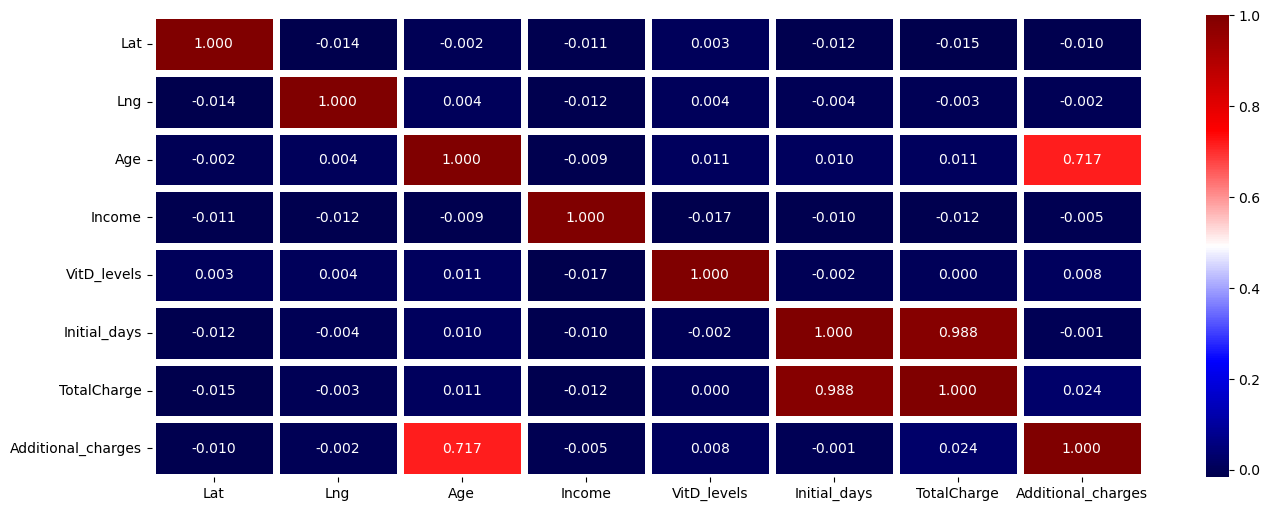

In [20]:
#create a heatmap for visual analysis of the correlation between features: 
corr = cont_df.corr()

ax = plt.subplots(figsize=(16,6))
sns.heatmap(corr, cmap='seismic', linewidth=5, annot=True, fmt='.3f')
plt.show()

Determine the components with highest variance using the Elbow and Kaiser methods

In [21]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.24876533, 0.21445127, 0.12785155, 0.12672499, 0.123619  ,
       0.12167434, 0.03545521, 0.00145832])

In [22]:
#create a numpy array with index starting with 1
pcomp = np.arange(pca.n_components_) + 1

<function matplotlib.pyplot.show(close=None, block=None)>

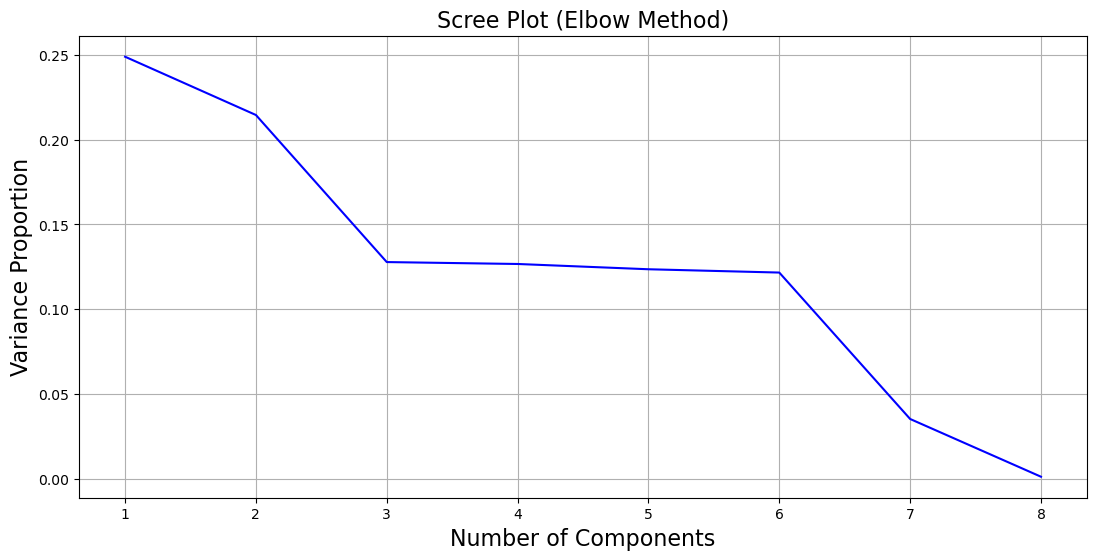

In [23]:
plt.figure(figsize = (13, 6))
plt.plot(pcomp,
         exp_var,
         'b-')
plt.title('Scree Plot (Elbow Method)', fontsize = 16)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel ('Variance Proportion', fontsize = 16)
#show grid lines
plt.grid()
plt.show

Interpret results

In [24]:
print(dict(zip(['PC1', 'PC2', 'PC3'], pcomp)))

{'PC1': 1, 'PC2': 2, 'PC3': 3}


In [25]:
#identify the variance for each PC
print('Variance of the first three principal components:')
print(pca.explained_variance_[:3])

Variance of the first three principal components:
[1.99032808 1.71578723 1.02291802]


In [26]:
#get the explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_

#access the first three explained variance ratios
pcom1 = explained_variance_ratio[0]
pcom2 = explained_variance_ratio[1]
pcom3 = explained_variance_ratio[2]

#print the explained variance ratios for the first three principal components
print('The explained variance ratio of the first principal component:', pcom1)
print('The explained variance ratio of the second principal component:', pcom2)
print('The explained variance ratio of the third principal component:', pcom3)


The explained variance ratio of the first principal component: 0.24876532958378497
The explained variance ratio of the second principal component: 0.21445126567089082
The explained variance ratio of the third principal component: 0.12785155419919572


In [27]:
#sum of the explained variance ratios of the first three principal components
total_variance = np.sum(pca.explained_variance_ratio_[:3])

#print the total variance
print('Total variance explained by the first three principal components:', total_variance)


Total variance explained by the first three principal components: 0.5910681494538715


In [28]:
print('Explained variance by component: \n', exp_var)
total_variance = sum(pca.explained_variance_ratio_)
print(f'Total variance captured by the principal components: {total_variance * 100:.2f}%')

Explained variance by component: 
 [0.24876533 0.21445127 0.12785155 0.12672499 0.123619   0.12167434
 0.03545521 0.00145832]
Total variance captured by the principal components: 100.00%


Kaiser Criterion 

In [29]:
var = pca.explained_variance_
var

array([1.99032808, 1.71578723, 1.02291802, 1.01390459, 0.98905406,
       0.97349517, 0.28367095, 0.01166775])

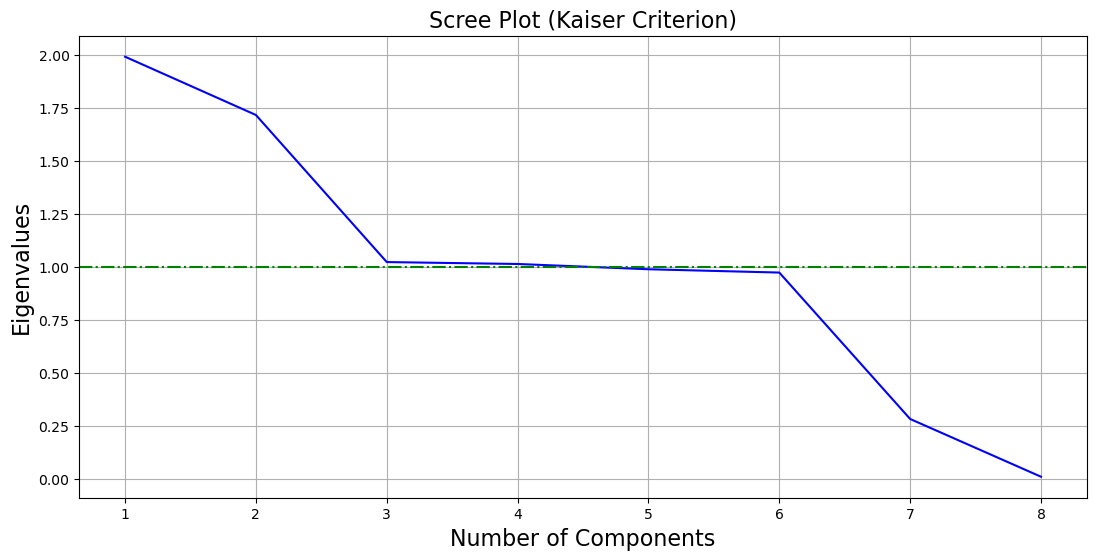

In [30]:
#create the figure with specified size
plt.figure(figsize=(13, 6))

# Plot the data
plt.plot(pcomp, var, 'b')

#add title and labels
plt.title('Scree Plot (Kaiser Criterion)', fontsize=16)
plt.xlabel('Number of Components', fontsize=16)
plt.ylabel('Eigenvalues', fontsize=16)

#add a horizontal line at y=1 for the Kaiser criterion
plt.axhline(y=1, color='g', linestyle='dashdot')

#show grid lines
plt.grid()

#show the plot
plt.show()


In [31]:
# Calculate the number of components to keep using the Kaiser criterion
eigenvalues = pca.explained_variance_
num_kaiser = np.sum(eigenvalues > 1)
print(f'Number of principal components to keep (Kaiser criterion): {num_kaiser}')

Number of principal components to keep (Kaiser criterion): 4


In [32]:
print(dict(zip(['PC1', 'PC2', 'PC3', 'PC4'], pcomp)))

{'PC1': 1, 'PC2': 2, 'PC3': 3, 'PC4': 4}


In [33]:
#identify the variance for each PC
print('Variance of the first four principal components:')
print(pca.explained_variance_[:4])

Variance of the first four principal components:
[1.99032808 1.71578723 1.02291802 1.01390459]


In [34]:
#get the explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_

#access the first four explained variance ratios
pcom1 = explained_variance_ratio[0]
pcom2 = explained_variance_ratio[1]
pcom3 = explained_variance_ratio[2]
pcom4 = explained_variance_ratio [3]
#print the explained variance ratios for the first three principal components
print('The explained variance ratio of the first principal component:', pcom1)
print('The explained variance ratio of the second principal component:', pcom2)
print('The explained variance ratio of the third principal component:', pcom3)
print('The explained variance ration of the fourth pricipal component:', pcom4)

The explained variance ratio of the first principal component: 0.24876532958378497
The explained variance ratio of the second principal component: 0.21445126567089082
The explained variance ratio of the third principal component: 0.12785155419919572
The explained variance ration of the fourth pricipal component: 0.12672499192182574


In [35]:
#sum of the explained variance ratios of the first four principal components captured by Kaider rule
total_variance = np.sum(pca.explained_variance_ratio_[:4])

#print the total variance
print('Total variance explained by the first four principal components capture by Kaiser rule:', total_variance)


Total variance explained by the first four principal components capture by Kaiser rule: 0.7177931413756973


In [36]:
# Perform PCA with 4 components
pc4 = PCA(n_components=4, random_state=2020)
pc4.fit(scaled_data)
var_pca = pc4.transform(scaled_data)

# Get the explained variance ratio for the 4 components
pca_4 = pc4.explained_variance_ratio_ * 100

# Create a DataFrame to capture the variance per principal component
captured_variance_df = pd.DataFrame(pca_4, columns=['Captured Variance Per PC'], 
                                    index=['PC1', 'PC2', 'PC3', 'PC4'])

# Round the values to 2 decimal places
captured_variance_df = captured_variance_df.round(2)

# Display the DataFrame
print(captured_variance_df)


     Captured Variance Per PC
PC1                     24.88
PC2                     21.45
PC3                     12.79
PC4                     12.67


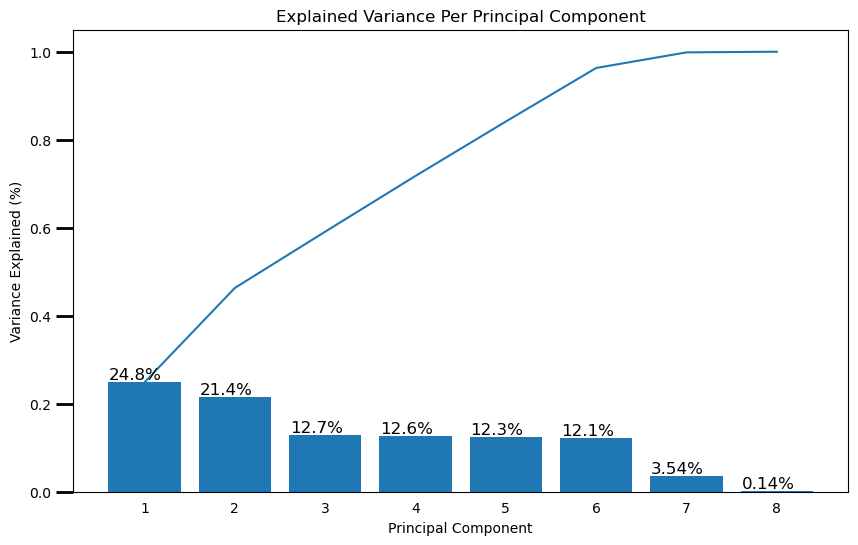

In [37]:
# Developed as part of WGUs DMDA Udacity Nano Degree Program
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(1, num_components + 1)  # Start from 1 instead of 0
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i] * 100)[:4])), (ind[i] - 0.1, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

# Call the function with the PCA object
scree_plot(pca)
